**LGM VIRTUAL INTERNSHIP**

**NAME : Gayatri Sunil Yadav**

**Stock Market Prediction And Forcasting Using Stacked LSTM**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import math
from math import ceil
import pandas as pd
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM 
import matplotlib.pyplot as plt



In [4]:
data= pd.read_csv('/content/drive/MyDrive/data/MSFT[1].csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062970,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.065219,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.066344,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064657,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063533,47894400
...,...,...,...,...,...,...,...
8411,2019-07-26,140.369995,141.679993,140.300003,141.339996,141.339996,19037600
8412,2019-07-29,141.500000,141.509995,139.369995,141.029999,141.029999,16605900
8413,2019-07-30,140.139999,141.220001,139.800003,140.350006,140.350006,16846500
8414,2019-07-31,140.330002,140.490005,135.080002,136.270004,136.270004,38598800


In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8.416000e+03
mean,26.724228,27.011383,26.433939,26.729012,22.012425,6.094392e+07
std,25.579483,25.799075,25.337877,25.580985,24.982907,3.891822e+07
min,0.088542,0.092014,0.088542,0.090278,0.058473,2.304000e+06
25%,3.255860,3.302735,3.214844,3.265625,2.115133,3.733340e+07
50%,26.059999,26.370001,25.750000,26.059999,18.452178,5.414265e+07
75%,33.457501,33.976248,33.000000,33.446250,25.030254,7.451730e+07
max,141.500000,141.679993,140.300003,141.339996,141.339996,1.031789e+09


In [6]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062970,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.065219,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.066344,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.064657,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.063533,47894400


In [7]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8411,2019-07-26,140.369995,141.679993,140.300003,141.339996,141.339996,19037600
8412,2019-07-29,141.500000,141.509995,139.369995,141.029999,141.029999,16605900
8413,2019-07-30,140.139999,141.220001,139.800003,140.350006,140.350006,16846500
8414,2019-07-31,140.330002,140.490005,135.080002,136.270004,136.270004,38598800
8415,2019-08-01,137.000000,140.940002,136.929993,138.059998,138.059998,40532000


In [8]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<Axes: >

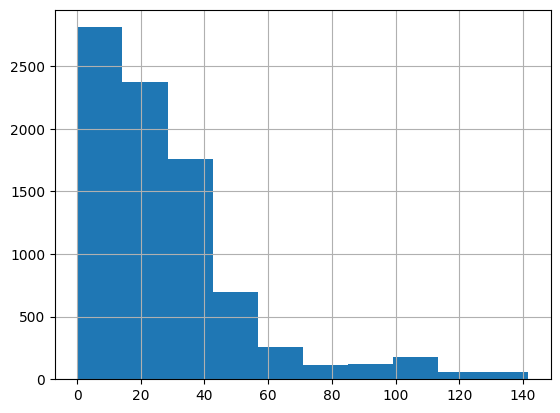

In [9]:
data['High'].hist()

In [10]:
data['Date'].value_counts()

1986-03-13    1
2008-06-25    1
2008-06-23    1
2008-06-20    1
2008-06-19    1
             ..
1997-04-09    1
1997-04-08    1
1997-04-07    1
1997-04-04    1
2019-08-01    1
Name: Date, Length: 8416, dtype: int64

<Axes: >

<Figure size 2000x800 with 0 Axes>

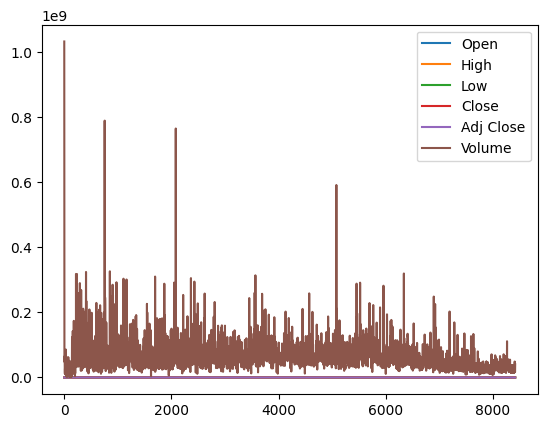

In [11]:
plt.figure(figsize=(20,8))
data.plot()

In [12]:

d1 = data.filter(['close'])
dataset = data.values
training_data_len= math.ceil(len(data)*8)
training_data_len


67328

In [13]:
trainingdata =data.iloc[:,1:2].value_counts
trainingdata

<bound method DataFrame.value_counts of             Open
0       0.088542
1       0.097222
2       0.100694
3       0.102431
4       0.099826
...          ...
8411  140.369995
8412  141.500000
8413  140.139999
8414  140.330002
8415  137.000000

[8416 rows x 1 columns]>

In [14]:
data= data.iloc[:,0:5]
data

,Date,Open,High,Low,Close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222
1,1986-03-14,0.097222,0.102431,0.097222,0.100694
2,1986-03-17,0.100694,0.103299,0.100694,0.102431
3,1986-03-18,0.102431,0.103299,0.098958,0.099826
4,1986-03-19,0.099826,0.100694,0.097222,0.098090
...,...,...,...,...,...
8411,2019-07-26,140.369995,141.679993,140.300003,141.339996
8412,2019-07-29,141.500000,141.509995,139.369995,141.029999
8413,2019-07-30,140.139999,141.220001,139.800003,140.350006
8414,2019-07-31,140.330002,140.490005,135.080002,136.270004


In [15]:
data[ 'Date'] = pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
df= data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222
1,1986-03-14,0.097222,0.102431,0.097222,0.100694
2,1986-03-17,0.100694,0.103299,0.100694,0.102431
3,1986-03-18,0.102431,0.103299,0.098958,0.099826
4,1986-03-19,0.099826,0.100694,0.097222,0.098090


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

,index,Date,Open,High,Low,Close
0,0,1986-03-13,0.088542,0.101563,0.088542,0.097222
1,1,1986-03-14,0.097222,0.102431,0.097222,0.100694
2,2,1986-03-17,0.100694,0.103299,0.100694,0.102431
3,3,1986-03-18,0.102431,0.103299,0.098958,0.099826
4,4,1986-03-19,0.099826,0.100694,0.097222,0.098090


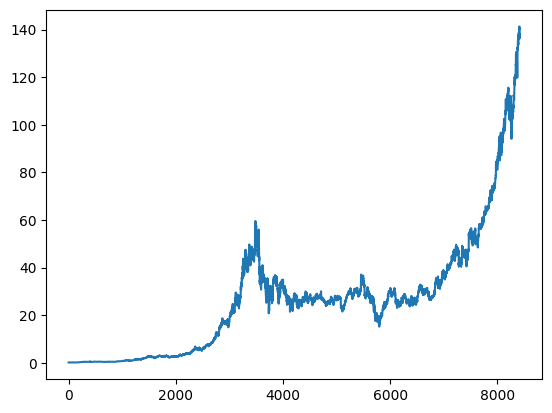

In [19]:
plt.plot(df ['Close'])

In [20]:
df1=df['Close']

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [28]:
df1.shape

(8416, 1)

Splitting Dataset into training and testing sets

In [29]:
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [30]:
training_size,test_size

(5470, 2946)

In [62]:
training_set= data.iloc[:,1:2].values
training_set


array([[8.85420000e-02],
       [9.72220000e-02],
       [1.00694000e-01],
       ...,
       [1.40139999e+02],
       [1.40330002e+02],
       [1.37000000e+02]])

In [32]:
len(train_data) , len(test_data)

(5470, 2946)

 preparing data 

In [24]:
def create_dataset(dataset,time_step=1):
  dataX,dataY = [],[]
  for i in range(len(dataset)-time_step-1):
      a= dataset[i:(i+time_step),0]
      dataX.apppend(a)
      dataY.append(dataset[i+ time_step,0])
      return np.array(dataX),np.array(dataY)

Scalling the Dataset

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler (feature_range=(0,1))

In [55]:
data_training_scaled = scaler. fit_transform( training_set)

In [56]:
feature_set =[]
labels=[]
for i in range(60,586):
   feature_set.append(data_training_scaled[i-60:i,0])
   labels.append(data_training_scaled[i,0])

In [63]:
feature_set,labels = np.array(feature_set), np.array(labels)


In [64]:
feature_set= np.reshape(feature_set,(feature_set.shape[0],feature_set.shape[1],1))
feature_set.shape

(526, 60, 1)

Building the LSTM

In [58]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [59]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(feature_set,labels,epochs = 50,batch_size =20)

Epoch 1/50


27/27 [==============================] - 21s 392ms/step - loss: 2.1401e-05
Epoch 2/50
27/27 [==============================] - 6s 220ms/step - loss: 1.4747e-06
Epoch 3/50
27/27 [==============================] - 8s 307ms/step - loss: 7.7799e-07
Epoch 4/50
27/27 [==============================] - 6s 221ms/step - loss: 7.3906e-07
Epoch 5/50
27/27 [==============================] - 8s 296ms/step - loss: 7.3517e-07
Epoch 6/50
27/27 [==============================] - 6s 214ms/step - loss: 7.9406e-07
Epoch 7/50
27/27 [==============================] - 7s 261ms/step - loss: 7.3811e-07
Epoch 8/50
27/27 [==============================] - 9s 328ms/step - loss: 7.2247e-07
Epoch 9/50
27/27 [==============================] - 8s 304ms/step - loss: 7.3774e-07
Epoch 10/50
27/27 [==============================] - 6s 211ms/step - loss: 6.8767e-07
Epoch 11/50
27/27 [==============================] - 7s 269ms/step - loss: 6.2582e-07
Epoch 12/50
27/27 [==============================] - 7s 242ms/step - loss

In [69]:
data_testing_complete = pd.read_csv('/content/drive/MyDrive/data/MSFT[1].csv')
data_testing_processed = data_testing_complete.iloc[:,1:2]
data_testing_processed

,Open
0,0.088542
1,0.097222
2,0.100694
3,0.102431
4,0.099826
...,...
8411,140.369995
8412,141.500000
8413,140.139999
8414,140.330002


Prediction of the Data

In [75]:
data_total = pd.concat((data['Open'], data['Open']), axis=0)

In [76]:
test_inputs=data_total[len(data_total) - len(data)-60:].values
test_inputs.shape

(8476,)

In [79]:
test_features =[]
for i in range(60,80):
  test_features.append(test_inputs[i-60:i,0])

In [81]:
test_features=np.array(test_features)
test_features=np.reshape(test_features,(test_features.shape[0],test_features.shape[1],1))

In [82]:
test_features.shape

(20, 60, 1)

In [84]:
predictions=model.predict(test_features)
predictions

array([[0.30291778],
       [0.30059612],
       [0.29688916],
       [0.2936369 ],
       [0.2913657 ],
       [0.29000315],
       [0.28933084],
       [0.28910792],
       [0.28904384],
       [0.28870672],
       [0.28764105],
       [0.28551382],
       [0.2821805 ],
       [0.2776202 ],
       [0.2718598 ],
       [0.2649519 ],
       [0.25697976],
       [0.24806666],
       [0.2383828 ],
       [0.22814046]], dtype=float32)

In [85]:
x_train = data[0:1256]
y_train= data[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [86]:
x_train

,Date,Open,High,Low,Close
0,1986-03-13,0.088542,0.101563,0.088542,0.097222
1,1986-03-14,0.097222,0.102431,0.097222,0.100694
2,1986-03-17,0.100694,0.103299,0.100694,0.102431
3,1986-03-18,0.102431,0.103299,0.098958,0.099826
4,1986-03-19,0.099826,0.100694,0.097222,0.098090
...,...,...,...,...,...
1251,1991-02-22,1.385417,1.451389,1.385417,1.420139
1252,1991-02-25,1.434028,1.444444,1.409722,1.430556
1253,1991-02-26,1.409722,1.423611,1.395833,1.413194
1254,1991-02-27,1.420139,1.468750,1.406250,1.461806


**Plotting the Result**

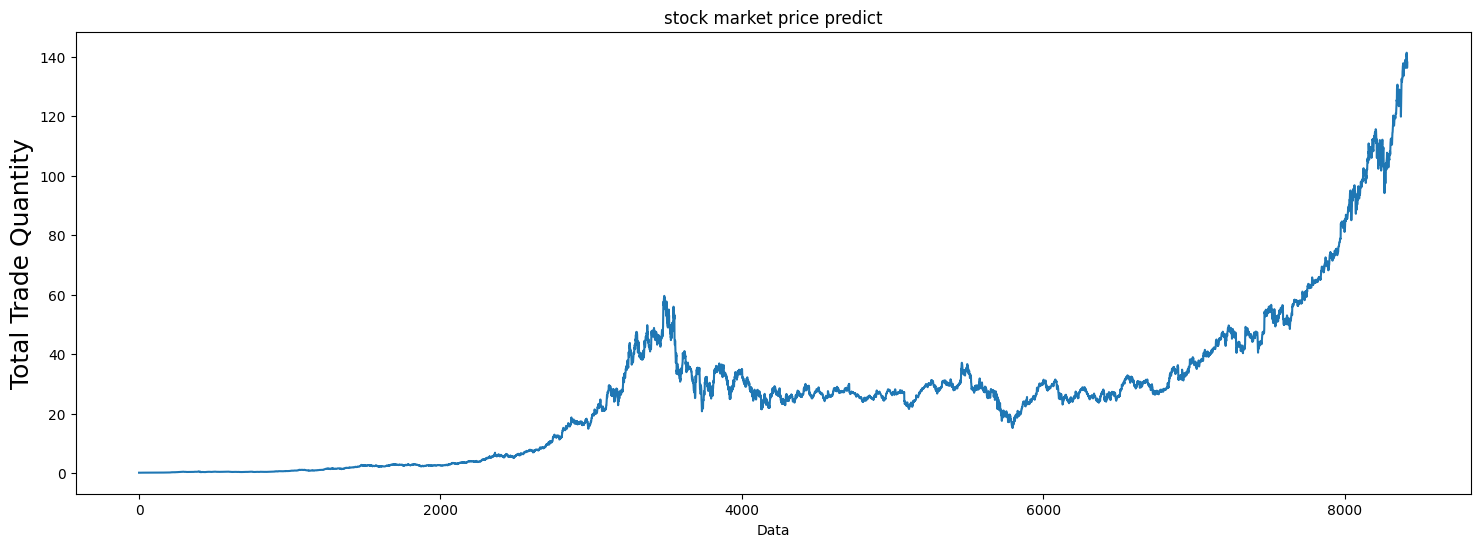

In [87]:
plt.figure(figsize=(18,6))
plt.title('stock market price predict')
plt.plot(data_testing_complete['Close'])
plt.xlabel('Data',fontsize=10)
plt.ylabel('Total Trade Quantity',fontsize=18)
plt.show()

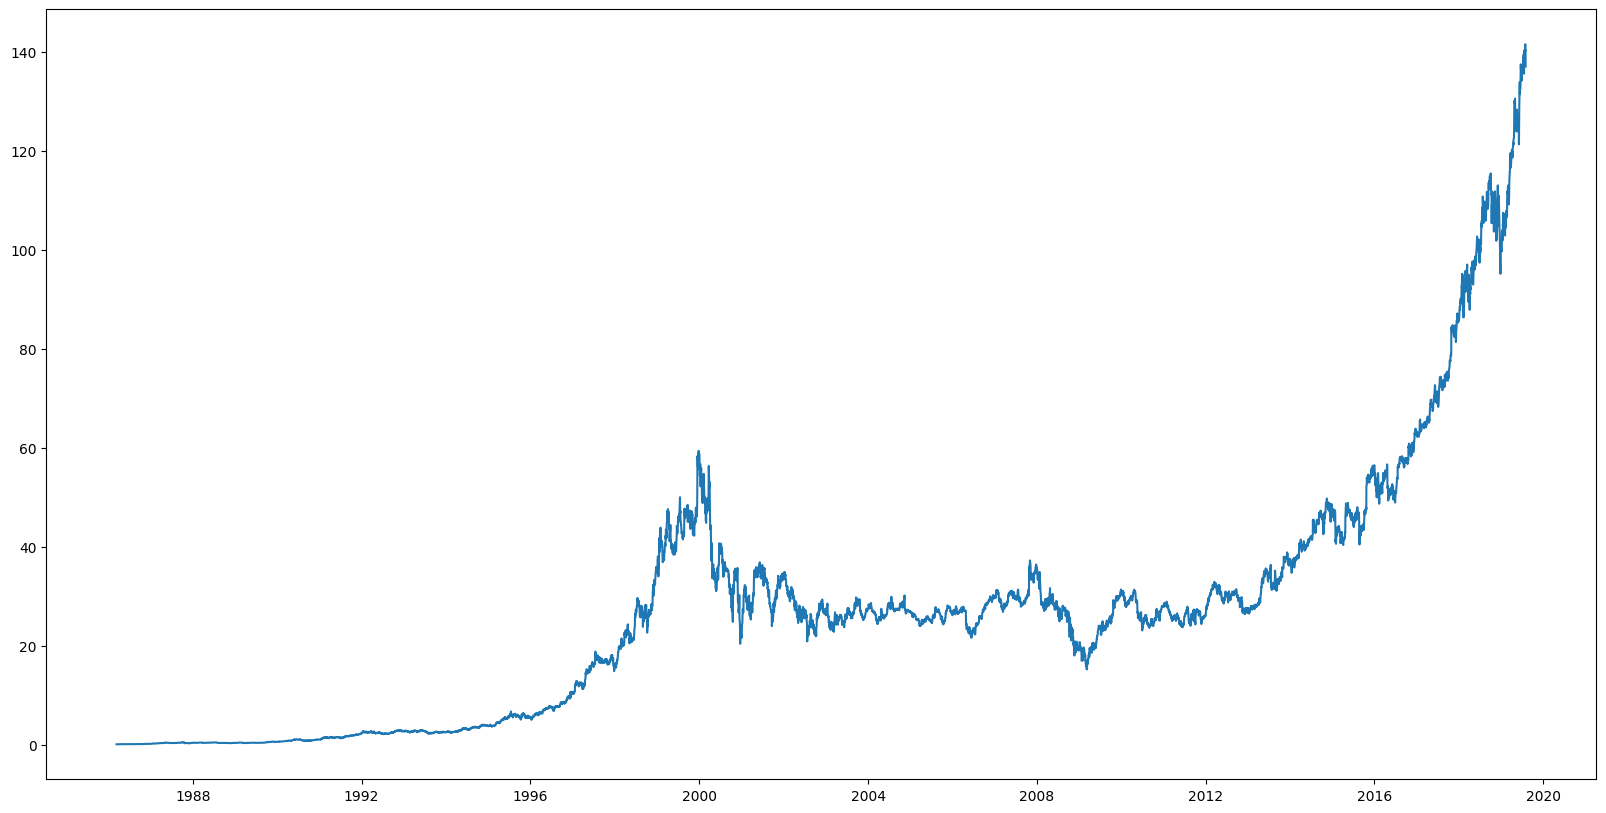

In [94]:
data ['Date']= pd.to_datetime(data.Date)
data.index=data['Date']

plt.figure(figsize=(20,10))
plt.plot(data['Open'],label='ClosePriceHist')

In [95]:
data['Turnover(Lacs)']=pd.to_datetime(data.Date)
data.index = data['Turnover(Lacs)']

In [96]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>